In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import dash
import plotly.express as px
import re
import numpy as np
import plotly.graph_objects as go

In [14]:
from dash import dcc
from dash import html

In [30]:
df = pd.read_csv('dataframe.csv')
# Converter a coluna 'Data de Publicação' para datetime
df['Data de Publicação'] = pd.to_datetime(df['Data de Publicação'])
df

,Título,Visualizações,Likes,Data de Publicação,Comentários,Duração,Regiões Restritas,Taxa de Engajamento
0,2024 Abu Dhabi Grand Prix,829660,38746,2024-12-08 16:10:25+00:00,2170,00:08:10,"['BY', 'RU']",4.93
1,2024 Qatar Grand Prix,5036414,99458,2024-12-03 14:01:35+00:00,4472,00:08:04,"['BY', 'RU']",2.06
2,2024 Las Vegas Grand Prix,6433037,136880,2024-11-28 17:07:39+00:00,4408,00:08:15,"['BY', 'RU']",2.20
3,2024 Sao Paulo Grand Prix,7981373,154697,2024-11-04 14:19:44+00:00,9872,00:08:10,"['BY', 'RU']",2.06
4,2024 Mexico City Grand Prix,6429057,129644,2024-10-28 09:22:41+00:00,5973,00:08:14,"['BY', 'RU']",2.11
5,2024 United States Grand Prix,5900090,116240,2024-10-25 00:31:26+00:00,7478,00:08:15,"['BY', 'RU']",2.10
6,2024 Singapore Grand Prix,5649094,103867,2024-10-25 00:31:26+00:00,3199,00:07:57,"['BY', 'RU']",1.90
7,2024 Azerbaijan Grand Prix,6882044,138679,2024-09-15 15:59:47+00:00,7501,00:08:11,"['BY', 'RU']",2.12
8,2024 Italian Grand Prix,6667731,138484,2024-09-04 14:35:01+00:00,5479,00:08:15,"['BY', 'RU']",2.16
9,2024 Dutch Grand Prix,5725978,113063,2024-08-25 19:49:01+00:00,3564,00:08:01,"['BY', 'RU']",2.04


#### Gráfico 1

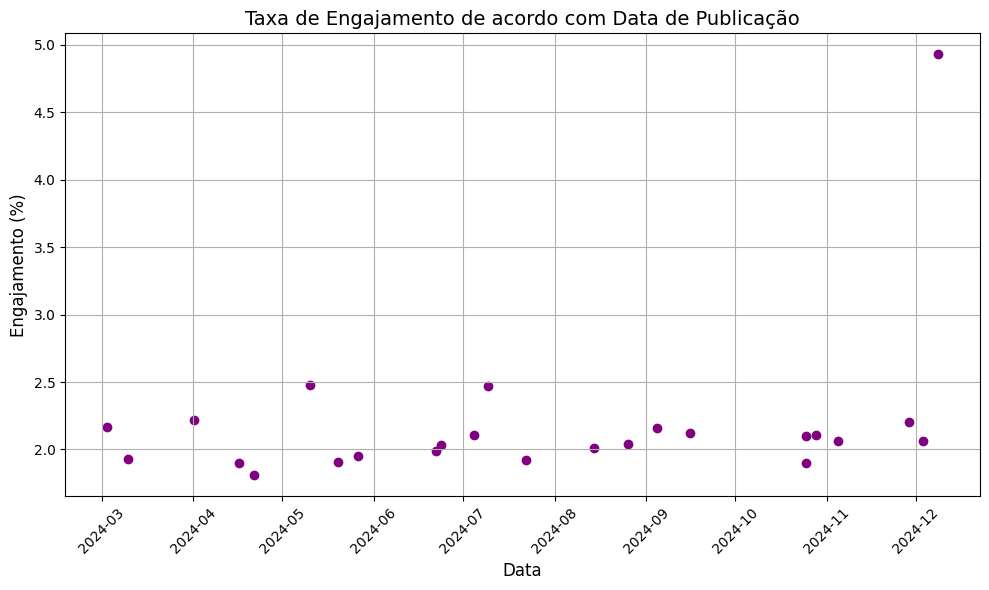

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Data de Publicação'], df['Taxa de Engajamento'], color='purple')
plt.title('Taxa de Engajamento de acordo com Data de Publicação', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Engajamento (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
# Ajuste de layout para evitar sobreposição
plt.tight_layout()
plt.show()

#### Gráfico 2

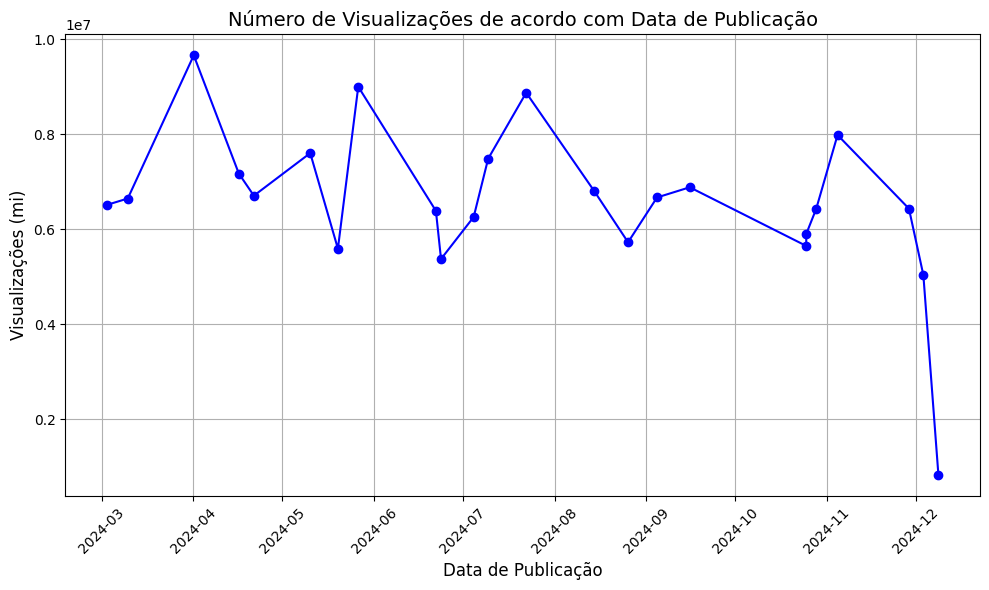

In [22]:
# Ordenar os vídeos pela data de publicação (do mais antigo para o mais novo)
df_sorted = df.sort_values(by='Data de Publicação')

plt.figure(figsize=(10, 6))
plt.plot(df_sorted['Data de Publicação'], df_sorted['Visualizações'], marker='o', linestyle='-', color='b', label='Visualizações')
plt.title('Número de Visualizações de acordo com Data de Publicação', fontsize=14)
plt.xlabel('Data de Publicação', fontsize=12)
plt.ylabel('Visualizações (mi)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
# Ajuste de layout para evitar sobreposição
plt.tight_layout()
plt.show()

#### Gráfico 3

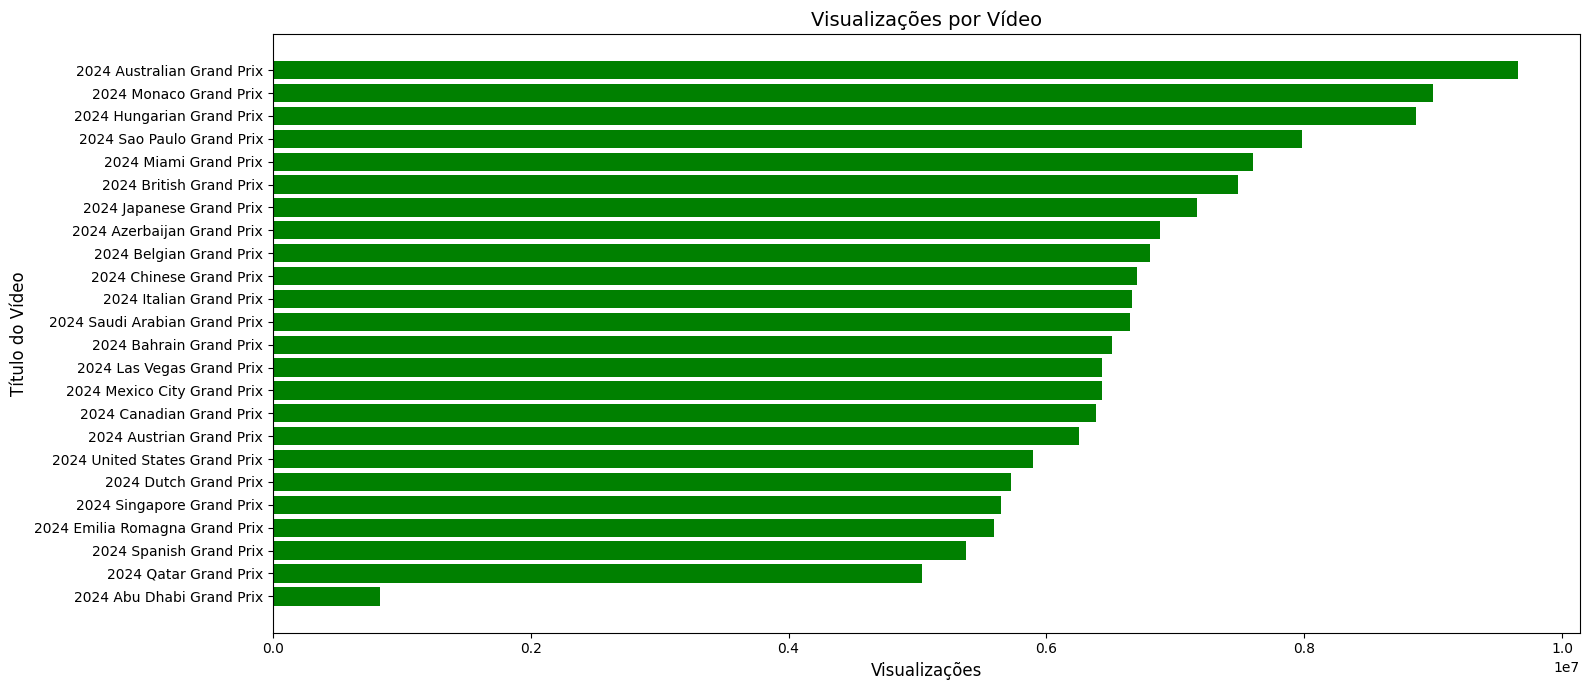

In [23]:
df_sorted_visu = df.sort_values(by="Visualizações")

plt.figure(figsize=(16, 7))
plt.barh(df_sorted_visu['Título'], df_sorted_visu['Visualizações'], color='green')
plt.title('Visualizações por Vídeo', fontsize=14)
plt.xlabel('Visualizações', fontsize=12)
plt.ylabel('Título do Vídeo', fontsize=12)
# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.show()

In [33]:
# Inicializando o app Dash
app = dash.Dash(__name__)

# Visualizações ao longo do Tempo
figura_views = px.line(df, x='Data de Publicação', y='Visualizações', title="Visualizações ao Longo do Tempo")
figura_views.update_layout(xaxis_title='Data de Publicação', yaxis_title='Visualizações', plot_bgcolor='white')

# Taxa de Engajamento ao longo do Tempo
figura_engajamento = px.scatter(df, x='Data de Publicação', y='Taxa de Engajamento', title="Engajamento ao Longo do Tempo")
figura_engajamento.update_traces(marker=dict(color='purple', size=8))

# Visualizações de cada Vídeo
figura_linha = px.bar(df, y='Título', x='Visualizações', title='Visualizações por Vídeo', orientation='h')
figura_linha.update_layout(xaxis_title='Visualizações', yaxis_title='Título do Vídeo')

# Gráfico de Taxa de Engajamento por Vídeo
figura_engajamento_video = px.bar(df, y='Título', x='Taxa de Engajamento', title='Engajamento por Vídeo', orientation='h')
figura_engajamento_video.update_layout(xaxis_title='Taxa de Engajamento (%)', yaxis_title='Título do Vídeo')

# Layout do Dashboard
app.layout = html.Div(children=[
    html.H1("Estudo de Playlist de Highlights das Corridas de Fórmula 1 2024", style={'text-align': 'center'}),

    # Div do gráfico de Visualizações ao longo do Tempo
    html.Div(children=[
        html.H2("Visualizações ao Longo do Tempo"),
        dcc.Graph(
            id='views-line',
            figure=figura_views
        ),
    ], style={'padding': '20px'}),

    # Div do gráfico de Taxa de Engajamento ao longo do Tempo
    html.Div(children=[
        html.H2("Taxa de Engajamento ao Longo do Tempo"),
        dcc.Graph(
            id='engagement-scatter',
            figure=figura_engajamento
        ),
    ], style={'padding': '20px'}),

    # Div do gráfico de Gráfico de Taxa de Engajamento por Vídeo
    html.Div(children=[
        html.H2("Top Vídeos por Taxa de Engajamento"),
        dcc.Graph(
            id='engagement-bar',
            figure=figura_engajamento_video
        ),
    ], style={'padding': '20px'}),

    # Div do gráfico de Visualizações de cada Vídeo
    html.Div(children=[
        html.H2("Top Vídeos por Visualizações"),
        dcc.Graph(
            id='views-bar',
            figure=figura_linha
        ),
    ], style={'padding': '20px'}),

    # Filtragem
    html.Div(children=[
        html.H2("Métodos de Filtragem Interativa"),
        
        dcc.Dropdown(
            id='filter-dropdown',
            options=[
                {'label': 'Taxa de Engajamento ao Longo do Tempo', 'value': 'engagement'},
                {'label': 'Visualizações ao Longo do Tempo', 'value': 'views'},
            ],
            value='views',
            style={'width': '50%'}
        ),
        
        dcc.Graph(id='filter-graph')
    ], style={'padding': '20px'})
])

# Função pra alterar gráficos de com o dropdown
@app.callback(
    dash.dependencies.Output('filter-graph', 'figure'),
    [dash.dependencies.Input('filter-dropdown', 'value')]
)

def update_grafico(selected_metric):
    if selected_metric == 'views':
        # Visualizações ao longo do tempo
        fig = px.line(df, x='Data de Publicação', y='Visualizações', title="Visualizações ao Longo do Tempo")
        fig.update_layout(xaxis_title='Data de Publicação', yaxis_title='Visualizações', plot_bgcolor='white')
    elif selected_metric == 'engagement':
        # Taxa de Engajamento ao longo do tempo
        fig = px.scatter(df, x='Data de Publicação', y='Taxa de Engajamento', title="Taxa de Engajamento ao Longo do Tempo")
        fig.update_traces(marker=dict(color='purple', size=8))
    return fig  


In [34]:
# Rodar o servidor diretamente no Jupyter Notebook
app.run_server(debug=True, mode="inline")